# PH2103 Thermal Physics - Prof. Massimo Pica Ciamarra


# Random Walk 

In this notebook we study few properties of the random walk model.

In [1]:
#This cells execute some "service" commands, to give to the notebook some analytical and graphical abilities.
%matplotlib notebook
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

## Trajectories of random walker in two spatial dimensions
We consider a single walker, starting in (0,0), and illustrate its trajectory on a lattice. You can execute the cell different times to get different trajectories.

### Generation of a trajectory

In [2]:
#number of steps
Nsteps = 1000
#step size
L = 1
# we create matrix, Path, of size Nstep x 2. 
# The two colums will contain the x and the y position after a given number of steps.
Path = np.empty([Nsteps,2])
#we fix the initial position, which is (0,0)
Path[0,0]=0
Path[0,1]=0

#we now perform the walk
#at each step, we select a random component (x or y, and thus column 0 or column 1), and a random direction, +1 o -1.
#we then perform a step, updating the position of the selected component
for step in range(1,Nsteps):
    #we select a random component, using random_sample() that returns a random number in the interval [0,1]
    if np.random.random_sample() < 0.5: component = 0 
    else: component = 1        
    #we select a random direction
    if np.random.random_sample() < 0.5: direction = -1 
    else: direction = 1
    
    #we perform a step along the selected component, in the given direction
    Path[step,component] = Path[step-1,component]+direction*L
    #along the other component, the position equals the previous one
    Path[step,1-component] = Path[step-1,1-component]




### Illustration of a trajectory

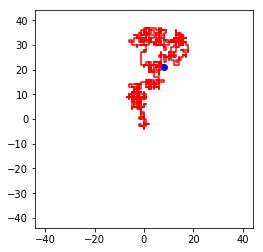

In [4]:
#since we have Nsteps steps, we expect <R^2> = Nsteps*L. 
#Therefore, the trajectory will be confined in a square with typical size sqrt(Nstep*L).
#we first determine the limit of the figure
limit = np.rint(1.4*(L*Nsteps)**0.5) #the x,y axis show data in the range -limit to +limit
#we set the limit of the figure
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)    
#we make the figure
#the trajectory is colored red, with a full line 'r-'
#the final position is blue, and represented using a circle 'bo'
plt.plot(Path[:Nsteps,0],Path[:Nsteps,1],'r-',Path[Nsteps-1:Nsteps,0],Path[Nsteps-1:Nsteps,1],'bo')  
ax = plt.gca()
ax.set_aspect('equal')

#plt.show()

### Animation of a trajectory
We first create an animation. We create a sequence of images, with the trajectory after a different number of steps, and then convert the sequence in a movie

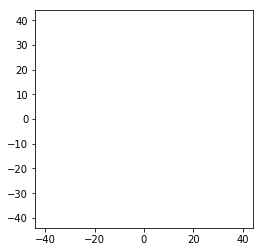

In [5]:
'''
we first create a figure, with some axes
fig is useful if we want to change properties of the figure, or to save it
a figure is a canvans, with some properties (background color etc, we don't change)
'''
fig, ax = plt.subplots()
'''
we add a first set of data: currently at empty set to be rendered as a red line
we access to this set of data using "ln"
'''
ln, = plt.plot([], [], 'r-', animated=True)
'''
we add a second set of data: currently at empty set to be rendered as blue circles
we access to this set of data using "ln2"
'''
ln2, = plt.plot([], [], 'bo', animated=True)

'''we want a squar size ratio'''
ax.set_aspect('equal')

def init():
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    return ln,

def update(frame):
    '''we specify what are the data for the red line'''
    ln.set_data(Path[:frame,0], Path[:frame,1]) 
    '''and for the blue circle'''
    ln2.set_data(Path[frame-1:frame,0], Path[frame-1:frame,1]) 
    return ln,

ani = FuncAnimation(fig, update, frames=Nsteps, init_func=init, blit=True)
ani

## Distribution of the end-to-end distance

We compute the final $x_{end}$ positions of Nwalkers walkers starting in $x_{start} = 0$, and then plot the distribution of $x_{end}$.

In [6]:
'''
In this cell we define a function, randomwalker, that depends on four parameters:
N = number of steps
start = initial position
L = step length
path = this is another function, to be defined later, that generate an array of N -1;+1 random numbers
'''
def randomwalker(N, start, L, path):
    '''steps = vecor of N elements, that can be +1 or -1'''
    steps    = path(N)
    '''final position'''
    position = start + L*steps.sum()
    '''the outcome of the function is the position after N steps'''
    return position

'''we 'vectorize' the function randomwalker, to study many walkers at the same time
This means that we can give as input to the function not scalars, but vectors.
In particular, we will give as imput a vector containing a number Nwalkers of initial positions,
and will get as output a Nwalkers final positions.
'''
randomwalker = np.vectorize(randomwalker)

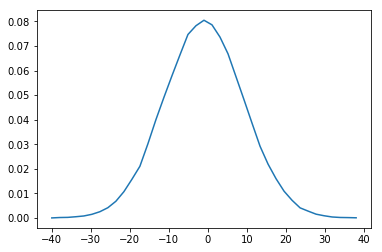

In [6]:
'''
we not study the distribution of the final position of a number of walkers
'''

'''number of walkers'''
Nwalkers = 100000
'''number of steps'''
Nsteps = 100
'''step size'''
L = 1
'''probability to move in the positive direction'''
prob_right = 0.5

'''
a function that returns a list of N random number, that are either +1 or -1
np.random.rand(N) is a function that returns N random numbers uniformly distributed between 0 and 1
using np.where we transform it in a list of -1 and +1
'''
path = lambda Nsteps : np.where(np.random.rand(Nsteps) > prob_right, -1, 1)

'''
we call the function randomwalker. 
the result "walkers", is an array of Nwalkers element
we consider the case in which all walkers start from the same position, x = 0
'''
walkers  = randomwalker(Nsteps, 0*np.random.random(Nwalkers), L, path)

'''
we now make a plot of the final position.
we known that R^2 = Nsteps * L^2
thus, typical values of R will be L sqrt(N); this allows us to fix the boundaries of the plot
'''
rmin = -4*Nsteps**0.5*L
rmax = 4*Nsteps**0.5*L
'''
number of bins
'''
nbin = np.rint((2*rmax)/2)
'''make the hisotgram'''
hist, bins = np.histogram(walkers, bins = np.linspace(rmin, rmax, nbin))

'''plot the histogram; the number of walkers per bin'''
plt.plot(bins[:-1], hist/Nwalkers)